In [1]:
!pip install -r requirements.txt

You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
from __future__ import print_function
import torch
from torchvision import datasets, transforms
import numpy as np
from WeakLearners import WongNeuralNetCIFAR10
import matplotlib.pyplot as plt


In [3]:
from Boosting import runBoosting

In [4]:
import utils

In [5]:
cuda = torch.device('cuda:0')

# Vanilla Wong Neural Net CIFAR10

In [6]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

# Normalize the test set same as training set without augmentation
transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = datasets.CIFAR10(
    root="./data", train=True, download=True, transform=transform_train)
train_loader = torch.utils.data.DataLoader(
    trainset, batch_size=100, shuffle=True, num_workers=2)

testset = datasets.CIFAR10(
    root="./data", train=False, download=True, transform=transform_test)
test_loader = torch.utils.data.DataLoader(
    testset, batch_size=300, shuffle=True, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [7]:
cifar10_vanilla = WongNeuralNetCIFAR10()
cifar10_vanilla.fit(train_loader, test_loader, alpha = 0, epochs = 100, adv=False, epsilon=0)

adv: False
Epoch 0
it 99 val accuracy: 0.2667
it 199 val accuracy: 0.3967
it 299 val accuracy: 0.4567
it 399 val accuracy: 0.5100
it 499 val accuracy: 0.5400
Epoch 1


/usr/local/lib/python3.6/dist-packages/torch/optim/lr_scheduler.py:893: UserWarning: To get the last learning rate computed by the scheduler, please use `get_last_lr()`.
  "please use `get_last_lr()`.", UserWarning)


it 99 val accuracy: 0.5600
it 199 val accuracy: 0.5800
it 299 val accuracy: 0.6233
it 399 val accuracy: 0.6433
it 499 val accuracy: 0.6867
Epoch 2
it 99 val accuracy: 0.7000
it 199 val accuracy: 0.7433
it 299 val accuracy: 0.6833
it 399 val accuracy: 0.6933
it 499 val accuracy: 0.7667
Epoch 3
it 99 val accuracy: 0.7467
it 199 val accuracy: 0.7667
it 299 val accuracy: 0.7767
it 399 val accuracy: 0.7967
it 499 val accuracy: 0.8100
Epoch 4
it 99 val accuracy: 0.7833
it 199 val accuracy: 0.8000
it 299 val accuracy: 0.7900
it 399 val accuracy: 0.7967
it 499 val accuracy: 0.7767
Epoch 5
it 99 val accuracy: 0.8167
it 199 val accuracy: 0.8067
it 299 val accuracy: 0.8233
it 399 val accuracy: 0.8100
it 499 val accuracy: 0.8400
Epoch 6
it 99 val accuracy: 0.8100
it 199 val accuracy: 0.8033
it 299 val accuracy: 0.8133
it 399 val accuracy: 0.8300
it 499 val accuracy: 0.8400
Epoch 7
it 99 val accuracy: 0.8367
it 199 val accuracy: 0.8267
it 299 val accuracy: 0.8433
it 399 val accuracy: 0.8500
it 499 

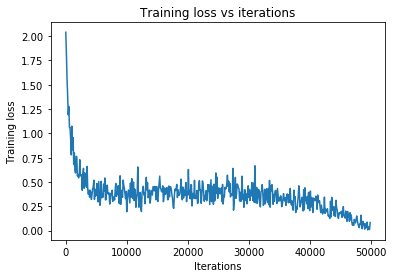

In [8]:
cifar10_vanilla.plot_train(batchSize = 100)

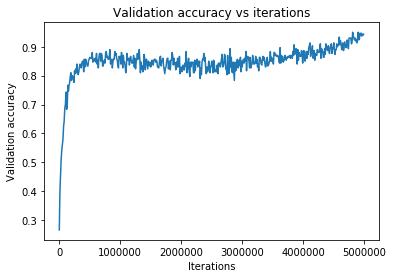

In [9]:
cifar10_vanilla.plot_val_accuracies(batchSize = 100)

In [14]:
print(cifar10_vanilla)